In [1]:
import tensorflow as tf
import keras as keras
import sys

In [2]:
## 00. 사용할 패키지 불러오기
from keras.datasets import mnist # 데이터 셋 불러오기
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

In [5]:
# 라벨링 전환
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

#  모델 구성하기

In [6]:
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [7]:
# 3. 모델의 오차함수, 최적화 함수 설정
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

In [8]:
from keras.callbacks import EarlyStopping

In [9]:
%%time

early_stopping = EarlyStopping(patience = 30)
hist = model.fit(X_train, y_train, epochs = 3000, batch_size = 10, validation_data = (X_val, y_val), callbacks = [early_stopping])

Epoch 1/3000
5000/5000 [==============================] - 8s 2ms/step - loss: 0.4599 - accuracy: 0.8684 - val_loss: 0.2489 - val_accuracy: 0.9278
Epoch 2/3000
5000/5000 [==============================] - 8s 2ms/step - loss: 0.2253 - accuracy: 0.9349 - val_loss: 0.1862 - val_accuracy: 0.9446
Epoch 3/3000
5000/5000 [==============================] - 7s 1ms/step - loss: 0.1733 - accuracy: 0.9495 - val_loss: 0.1518 - val_accuracy: 0.9567
Epoch 4/3000
5000/5000 [==============================] - 7s 1ms/step - loss: 0.1419 - accuracy: 0.9581 - val_loss: 0.1348 - val_accuracy: 0.9625
Epoch 5/3000
5000/5000 [==============================] - 8s 2ms/step - loss: 0.1191 - accuracy: 0.9651 - val_loss: 0.1260 - val_accuracy: 0.9650
Epoch 6/3000
5000/5000 [==============================] - 8s 2ms/step - loss: 0.1032 - accuracy: 0.9705 - val_loss: 0.1277 - val_accuracy: 0.9638
Epoch 7/3000
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0913 - accuracy: 0.9736 - val_loss: 0.1059 -

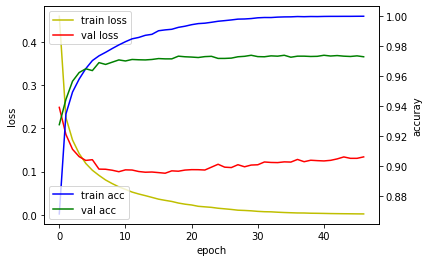

In [10]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()